In [0]:
#Importing the Required Modules
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import gensim
import pickle
import nltk
nltk.download('all')
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [0]:
#Loading the DATASET
dataset = pd.read_csv('/content/Reddit_India_Updated5.csv')

In [0]:
dataset.head(2)

,Unnamed: 0,flair,title,score,id,url,num_comm,body,created,author,comments,feature_combine
0,0,Politics,polite request indians,403,g2ct57,https://www.reddit.com/r/india/comments/g2ct57...,82,dont know situation countries seen lot organis...,1.587063e+09,aaluinsonaout,society thrives abuse power let many idiots ab...,polite request indianssociety thrives abuse po...
1,1,Politics,pitting community political party fucking stupid,198,futac9,https://www.reddit.com/r/india/comments/futac9...,73,first let start saying stupid whatever muslims...,1.586034e+09,chillinvillain122,country far moment theres turning back best ho...,pitting community political party fucking stup...


In [0]:
dataset.shape

(2419, 12)

In [0]:
# Creating Target Variable and Independent Variables
y_data = dataset['flair']  #We need to Predict These
y_data.shape

x_data1 = dataset['body']  # try to predict flair only based on body content
x_data2 = dataset['comments'] # try to predict flair only based on comments
x_data3 = dataset['feature_combine'] # try to predict flair based on a combination of features

In [0]:
#Experimentation log:-
#Experimented with Statistical Models before moving on to Deep-Learning Based Approach.

In [0]:
!pip uninstall xgboost

In [0]:
!pip install xgboost

In [11]:
import xgboost as xgb
print(xgb.__version__)

1.0.2


In [0]:
#Splitting the dataset for Training Purposes
#xdata3 has been used in final model because of higher accuracy observed on experimentation

X_train, X_test, y_train, y_test = train_test_split(x_data3,y_data, test_size=0.25, random_state = 2)

In [0]:
X_train.shape

(1814,)

In [0]:
X_test.shape

(605,)

In [0]:
y_train.value_counts()

Politics              186
Sports                182
Scheduled             177
AskIndia              177
Food                  175
Policy/Economy        169
Science/Technology    167
Non-Political         166
Business/Finance      166
AMA                   157
Reddiquette            92
Name: flair, dtype: int64

In [0]:
#Pipeline to use Oversampling Algorithms to balance class sizes
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler

In [0]:
#Model 1
#Training using SMOTE OverSampling and Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

tvec = TfidfVectorizer(stop_words=None, max_features=100000, ngram_range=(1, 3))
SMOTE_pipeline = make_pipeline(tvec, SMOTE(random_state=777), RandomForestClassifier(n_estimators=2000, n_jobs=-1))

In [0]:
SMOTE_pipeline.fit(X_train,y_train)

In [0]:
#Random Forest with SMOTE OverSampling gives 72.56 % Accuracy
y_pred = SMOTE_pipeline.predict(X_test)

print('accuracy of the model is %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy of the model is 0.7256198347107438
                    precision    recall  f1-score   support

               AMA       0.78      0.84      0.81        56
          AskIndia       0.51      0.69      0.59        55
  Business/Finance       0.82      0.63      0.71        67
              Food       0.86      0.87      0.86        69
     Non-Political       0.58      0.82      0.68        51
    Policy/Economy       0.58      0.61      0.60        51
          Politics       0.67      0.71      0.69        63
       Reddiquette       0.81      0.66      0.72        32
         Scheduled       0.97      0.53      0.68        57
Science/Technology       0.77      0.89      0.83        54
            Sports       0.92      0.70      0.80        50

          accuracy                           0.73       605
         macro avg       0.75      0.72      0.72       605
      weighted avg       0.76      0.73      0.73       605



In [0]:
#Model 2
#Extreme Gradient Boosted Trees with SMOTE Oversampling

import xgboost as xgb
SMOTE_pipeline2 = make_pipeline(tvec, SMOTE(random_state=777), xgb.XGBRFClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.01,
                max_depth = 15, alpha = 10, n_estimators = 15))

In [0]:
SMOTE_pipeline2.fit(X_train,y_train)

In [13]:
# XGBoost with SMOTE OverSampling gives 79.33 % Accuracy
y_pred = SMOTE_pipeline2.predict(X_test)

print('accuracy of the model is %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy of the model is 0.7933884297520661
                    precision    recall  f1-score   support

               AMA       0.84      0.82      0.83        56
          AskIndia       0.65      0.76      0.70        55
  Business/Finance       0.83      0.72      0.77        67
              Food       0.84      0.84      0.84        69
     Non-Political       0.83      0.76      0.80        51
    Policy/Economy       0.61      0.69      0.65        51
          Politics       0.79      0.71      0.75        63
       Reddiquette       0.81      0.91      0.85        32
         Scheduled       0.90      0.81      0.85        57
Science/Technology       0.80      0.94      0.86        54
            Sports       0.89      0.82      0.85        50

          accuracy                           0.79       605
         macro avg       0.80      0.80      0.80       605
      weighted avg       0.80      0.79      0.79       605



In [0]:
Pkl_Filename = "Pickle_RL_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(SMOTE_pipeline2, file)

In [0]:
with open(Pkl_Filename, 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)

In [0]:
#Saving the Model
filename = 'SMOTE_XGB_MODEL_Cleaned_Final2.sav'
pickle.dump(SMOTE_pipeline2, open(filename, 'wb'))

In [0]:
#Model 3
#Using Random OverSampler + XGBoost
ROS_pipeline = make_pipeline(tvec, RandomOverSampler(random_state=777), xgb.XGBRFClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.01,
                max_depth = 15, alpha = 10, n_estimators = 15))

In [0]:
ROS_pipeline.fit(X_train,y_train)

In [0]:
#XGBoost with Random Over Sampling Gives 78.5 % Accuracy
y_pred = ROS_pipeline.predict(X_test)

print('accuracy of the model is %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy of the model is 0.7851239669421488
                    precision    recall  f1-score   support

               AMA       0.87      0.82      0.84        56
          AskIndia       0.63      0.78      0.70        55
  Business/Finance       0.77      0.66      0.71        67
              Food       0.83      0.83      0.83        69
     Non-Political       0.78      0.78      0.78        51
    Policy/Economy       0.58      0.63      0.60        51
          Politics       0.78      0.68      0.73        63
       Reddiquette       0.85      0.91      0.88        32
         Scheduled       0.87      0.81      0.84        57
Science/Technology       0.81      0.96      0.88        54
            Sports       0.93      0.86      0.90        50

          accuracy                           0.79       605
         macro avg       0.79      0.79      0.79       605
      weighted avg       0.79      0.79      0.79       605



In [0]:
#Saving the Model
filename = 'ROS_XGB_MODEL_Cleaned_Final2.sav'
pickle.dump(ROS_pipeline, open(filename, 'wb'))

In [0]:
#Model 4
#Experiment with Random Under Sampling + XGBoost
from imblearn.under_sampling import NearMiss, RandomUnderSampler
RUS_pipeline = make_pipeline(tvec, RandomUnderSampler(random_state=777), xgb.XGBRFClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.01,
                max_depth = 15, alpha = 10, n_estimators = 15))


In [0]:
RUS_pipeline.fit(X_train, y_train)

In [0]:
#Random Under Sampling With XGBoost gives 79.17 % Accuracy
y_pred = RUS_pipeline.predict(X_test)

print('accuracy of the model is %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy of the model is 0.7917355371900826
                    precision    recall  f1-score   support

               AMA       0.87      0.82      0.84        56
          AskIndia       0.70      0.69      0.70        55
  Business/Finance       0.86      0.48      0.62        67
              Food       0.84      0.91      0.87        69
     Non-Political       0.69      0.80      0.75        51
    Policy/Economy       0.59      0.80      0.68        51
          Politics       0.90      0.73      0.81        63
       Reddiquette       0.82      0.88      0.85        32
         Scheduled       0.83      0.88      0.85        57
Science/Technology       0.79      0.91      0.84        54
            Sports       0.88      0.90      0.89        50

          accuracy                           0.79       605
         macro avg       0.80      0.80      0.79       605
      weighted avg       0.80      0.79      0.79       605



In [0]:
#Saving the Model
filename = 'RUS_XGB_MODEL_Cleaned_Final2.sav'
pickle.dump(RUS_pipeline, open(filename, 'wb'))

In [0]:
#Experimenting with Various Models without OverSampling or UnderSampling

In [0]:
#Model 1:- Using Random Forest
from sklearn.ensemble import RandomForestClassifier

#Case1:-Using x_data1
#Case2:-Using x_data2
#Case3:-Using x_data3

'''On Experimenting with all three Cases with a wide range of hyperparameters, it was found that
 x_data3 had most accuracy'''
#Results using x_data1 and x_data2 can be seen by replacing x_data3 in the code below.

#Splitting Data into Training and Tesing Sets
X_train, X_test, y_train, y_test = train_test_split(x_data3,y_data, test_size=0.25, random_state = 2)

#We build a Pipleline where Input Text in Vectorized Using TF-IDF Vectorizer and then we use Random Forest
  
  
clf = Pipeline([('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier(n_estimators=1200, n_jobs=-1))])
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('accuracy of the model is %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy of the model is 0.7669421487603306
                    precision    recall  f1-score   support

               AMA       0.79      0.79      0.79        56
          AskIndia       0.72      0.69      0.70        55
  Business/Finance       0.84      0.69      0.75        67
              Food       0.83      0.90      0.86        69
     Non-Political       0.63      0.80      0.71        51
    Policy/Economy       0.59      0.63      0.61        51
          Politics       0.69      0.78      0.73        63
       Reddiquette       0.80      0.62      0.70        32
         Scheduled       0.98      0.72      0.83        57
Science/Technology       0.77      0.93      0.84        54
            Sports       0.93      0.82      0.87        50

          accuracy                           0.77       605
         macro avg       0.78      0.76      0.76       605
      weighted avg       0.78      0.77      0.77       605



In [0]:
#Random Forest Gives 76.69% accuracy
#Confusion Matrix for Random Forest Classifier Using x_data3
confusion_matrix(y_test, y_pred)

array([[46,  1,  1,  0,  4,  1,  1,  1,  0,  1,  0],
       [ 1, 37,  2,  3,  4,  3,  1,  2,  0,  1,  1],
       [ 0,  2, 50,  1,  3,  4,  1,  1,  0,  5,  0],
       [ 2,  3,  0, 63,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  2,  0,  3, 41,  0,  2,  0,  0,  2,  1],
       [ 1,  1,  6,  1,  1, 31,  7,  0,  0,  2,  1],
       [ 0,  2,  0,  3,  3,  2, 50,  0,  1,  0,  2],
       [ 4,  2,  0,  0,  2,  3,  0, 21,  0,  0,  0],
       [ 1,  3,  2,  1,  1,  2,  5,  1, 40,  1,  0],
       [ 4,  0,  0,  0,  0,  0,  1,  0,  0, 49,  0],
       [ 1,  1,  0,  0,  1,  2,  2,  0,  0,  2, 41]])

In [0]:
#Saving the Model
filename = 'finalized_model_rf_Final.sav'
pickle.dump(clf, open(filename, 'wb'))

In [16]:
#Model 2:- Using Extreme Gradient Boosted Trees

#Case1:-Using x_data1
#Case2:-Using x_data2
#Case3:-Using x_data3

'''On Experimenting with all three Cases with a wide range of hyperparameters, it was found that
 x_data3 had most accuracy'''
#Results using x_data1 and x_data2 can be seen by replacing x_data3 in the code below.


#Splitting Data into Training and Tesing Sets
X_train, X_test, y_train, y_test = train_test_split(x_data3,y_data, test_size=0.3, random_state = 2)

#We build a Pipleline where Input Text in Vectorized Using TF-IDF Vectorizer and then we use Random Forest
  
clf4 = Pipeline([('tfidf', TfidfVectorizer()),
                ('clf4', xgb.XGBRFClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.001,
                max_depth = 15, alpha = 10, n_estimators = 15))])
clf4.fit(X_train, y_train)

y_pred = clf4.predict(X_test)

print('accuracy of the model is %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy of the model is 0.8085399449035813
                    precision    recall  f1-score   support

               AMA       0.89      0.82      0.85        68
          AskIndia       0.75      0.83      0.79        65
  Business/Finance       0.78      0.81      0.79        78
              Food       0.80      0.84      0.82        79
     Non-Political       0.77      0.73      0.75        63
    Policy/Economy       0.65      0.74      0.69        61
          Politics       0.82      0.74      0.78        76
       Reddiquette       0.87      0.85      0.86        39
         Scheduled       0.94      0.80      0.86        74
Science/Technology       0.83      0.87      0.85        63
            Sports       0.84      0.90      0.87        60

          accuracy                           0.81       726
         macro avg       0.81      0.81      0.81       726
      weighted avg       0.81      0.81      0.81       726



In [0]:
Pkl_Filename = "Pickle_RL_Model3.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(clf4, file)

In [0]:
#XGBoost Gives 80.85% Accuracy
#Confusion Matrix for XGBoost using x_data3
confusion_matrix(y_test, y_pred)

array([[32,  1,  0,  0,  0,  0,  0,  1,  1,  0,  0],
       [ 1, 33,  2,  2,  0,  3,  0,  2,  0,  0,  1],
       [ 1,  1, 22,  0,  0,  6,  0,  1,  0,  0,  1],
       [ 1,  1,  0,  8,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0, 12,  1,  0,  0,  0,  0,  3],
       [ 1,  0,  3,  1,  0, 23,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  1,  1,  2,  5,  1,  0,  1,  0],
       [ 1,  0,  1,  0,  0,  0,  1, 33,  1,  0,  1],
       [ 2,  6,  1,  0,  3,  1,  0,  0, 19,  0,  0],
       [ 0,  0,  2,  0,  0,  3,  0,  1,  0, 14,  1],
       [ 1,  1,  0,  0,  0,  1,  0,  0,  0,  1, 17]])

In [0]:
#Saving the Model
filename = 'finalized_model_xg2_Cleaned2.sav'
pickle.dump(clf4, open(filename, 'wb'))


In [0]:
#The next Model is Multi-Layer-Perceptron.All Null Values are removed Manually Before using it.
dataset2 = dataset

In [0]:
dataset2.isnull()

,Unnamed: 0,flair,title,score,id,url,num_comm,body,created,author,comments,feature_combine
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2414,False,False,False,False,False,False,False,False,False,False,False,False
2415,False,False,False,False,False,False,False,False,False,False,False,False
2416,False,False,False,False,False,False,False,False,False,False,False,False
2417,False,False,False,False,False,False,False,False,False,False,False,False


In [0]:
dataset2 = dataset2.dropna().reset_index(drop=True)

In [0]:
y_data2 = dataset2['flair']  #We need to Predict These
y_data2.shape

x_data1 = dataset2['body']  # try to predict flair only based on body content
x_data2 = dataset2['comments'] # try to predict flair only based on comments
x_data4 = dataset2['feature_combine'] # try to predict flair based on a combination of features

In [0]:
#Model 3:- Using Multi Layer Perceptron
from sklearn.neural_network import MLPClassifier

# As oberserved Combined_Features led to Increased Accuracy. Hence x_data4 is used


#Splitting Data into Training and Tesing Sets
X_train, X_test, y_train, y_test = train_test_split(x_data4,y_data2, test_size=0.3, random_state = 2)

#We build a Pipleline where Input Text in Vectorized Using TF-IDF Vectorizer and then we use Random Forest
  
clf3 = Pipeline([('tfidf', TfidfVectorizer()),
                ('clf3',  MLPClassifier(hidden_layer_sizes=(128,64,32), max_iter=300,activation = 'relu',solver='adam',random_state=1))])
clf3.fit(X_train, y_train)

y_pred = clf3.predict(X_test)

print('accuracy of the model is %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy of the model is 0.4383561643835616
                    precision    recall  f1-score   support

               AMA       0.69      0.43      0.53        51
          AskIndia       0.40      0.15      0.22        66
  Business/Finance       0.54      0.68      0.60        57
              Food       0.73      0.31      0.43        26
     Non-Political       1.00      0.04      0.07        28
    Policy/Economy       0.40      0.45      0.43        42
          Politics       0.44      0.15      0.22        27
       Reddiquette       0.75      0.66      0.70        32
         Scheduled       0.23      0.84      0.36        44
Science/Technology       0.50      0.39      0.44        33
            Sports       0.75      0.56      0.64        32

          accuracy                           0.44       438
         macro avg       0.58      0.42      0.42       438
      weighted avg       0.55      0.44      0.43       438



In [0]:
# Multi_Layer_Perceptron gave 43.83% Accuracy
#Confusion Matrix for Multi Layer Perceptron using x_data1
confusion_matrix(y_test, y_pred)

array([[21, 10,  0,  2,  0,  0,  1,  0,  1,  0,  0],
       [ 2, 25,  5,  2,  2,  1,  4,  1,  0,  1,  1],
       [ 0,  5, 19,  0,  0,  5,  1,  0,  0,  2,  0],
       [ 0,  1,  1,  6,  0,  0,  2,  0,  0,  0,  0],
       [ 1, 12,  1,  0,  1,  0,  1,  0,  0,  0,  1],
       [ 2,  4,  7,  1,  1,  7,  3,  0,  2,  0,  2],
       [ 0,  2,  0,  1,  0,  0,  5,  2,  0,  0,  1],
       [ 1,  8,  2,  0,  0,  1,  1, 23,  2,  0,  0],
       [ 1, 17,  3,  2,  0,  0,  1,  0,  7,  0,  1],
       [ 1,  2, 11,  0,  0,  1,  0,  1,  0,  5,  0],
       [ 2,  5,  0,  0,  0,  0,  1,  1,  0,  0, 12]])

In [0]:
#Experiment with Deep-Learning Architectures

In [0]:
#Model 1
#CNN for Text-Classification
''' The motivation for using CNN for text classification comes from the fact that CNNs are known to be
good at Detecting Spatial Relationship and Extract Meaningful patterns. To detect a flair, the context 
of an article can be understood by observing relationship between words. Hence, I experimented with 
CNNs'''

In [0]:
import tensorflow as tf
print(tf.__version__)

2.2.0-rc3


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

In [0]:
from keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D

In [0]:
max_words = 1500
max_len = 200
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(x_data3)
sequences = tok.texts_to_sequences(x_data3)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [0]:
print(type(y_data))

<class 'pandas.core.series.Series'>


In [0]:
Y = pd.get_dummies(dataset['flair']).values
Y.shape

(2419, 11)

In [0]:
EMBEDDING_DIM = 200

In [0]:
X_train, X_test, y_train, y_test = train_test_split(sequences_matrix,Y, test_size=0.15, random_state = 2)

In [0]:
X_train.shape

(2056, 200)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout

In [0]:
# Adam Optimizer was used for Experiment
adam = tf.keras.optimizers.Adadelta(learning_rate=0.01, rho=0.95)

In [0]:
# Building a Deep CNN model
model = Sequential()
model.add(Embedding(max_words, EMBEDDING_DIM, input_length=sequences_matrix.shape[1]))
model.add(SpatialDropout1D(0.2))
#Layer 1
model.add(Conv1D(
                    nb_filter=16,
                    filter_length=1,
                    border_mode="valid",
                    activation="relu",
                        ))

# Using standard max pooling 
model.add(MaxPooling1D(pool_length=2))
                       
#Layer 2
model.add(Conv1D(
                    nb_filter=32,
                    filter_length=2,
                    border_mode="valid",
                    activation="relu",
                        ))

# Using standard max pooling 
model.add(MaxPooling1D(pool_length=2))  

#Layer 3
model.add(Conv1D(
                    nb_filter=64,
                    filter_length=4,
                    border_mode="valid",
                    activation="relu",
                        ))

# Using standard max pooling
model.add(MaxPooling1D(pool_length=2)) 

#Layer 4
model.add(Conv1D(
                    nb_filter=128,
                    filter_length=6,
                    border_mode="valid",
                    activation="relu",
                        ))

# Using standard max pooling 
model.add(MaxPooling1D(pool_length=2)) 

#Layer 5
model.add(Conv1D(
                    nb_filter=256,
                    filter_length=8,
                    border_mode="valid",
                    activation="relu",
                        ))

# Using standard max pooling
model.add(MaxPooling1D(pool_length=2))

# Flattening to Make a Fully Connected Neural Network
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(11, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

In [0]:
#Training the Model
epochs = 20
batch_size = 15

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1644 samples, validate on 412 samples
Epoch 1/20
1644/1644 [==============================] - 5s 3ms/step - loss: 2.3648 - accuracy: 0.1150 - val_loss: 2.2223 - val_accuracy: 0.1626
Epoch 2/20
1644/1644 [==============================] - 4s 2ms/step - loss: 2.1880 - accuracy: 0.1740 - val_loss: 2.0968 - val_accuracy: 0.1845
Epoch 3/20
1644/1644 [==============================] - 4s 2ms/step - loss: 2.0454 - accuracy: 0.1904 - val_loss: 2.0094 - val_accuracy: 0.2257
Epoch 4/20
1644/1644 [==============================] - 4s 2ms/step - loss: 1.8625 - accuracy: 0.2482 - val_loss: 1.9008 - val_accuracy: 0.2646
Epoch 5/20
1644/1644 [==============================] - 4s 2ms/step - loss: 1.6717 - accuracy: 0.3339 - val_loss: 1.8055 - val_accuracy: 0.3204
Epoch 6/20
1644/1644 [==============================] - 4s 2ms/step - loss: 1.4899 - accuracy: 0.4197 - val_loss: 1.6956 - val_accuracy: 0.4126
Epoch 7/20
1644/1644 [==============================] - 4s 2ms/step - loss: 1.2445 - accu

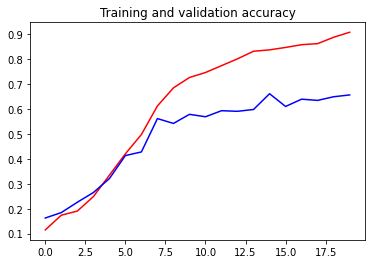

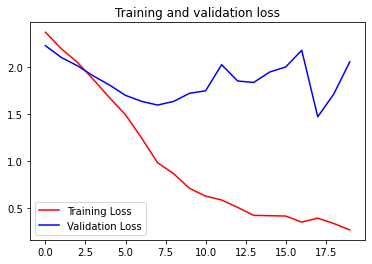

In [0]:
#Visualising Performance of the Deep-Model
#Although the Model Didn't Overfit , its Max Accuracy is around 66% which is lesser than Previous Results

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
#Saving the Model
import pickle
filename = 'CNN_model_final.sav'
pickle.dump(model, open(filename, 'wb'))

In [0]:
#Model 2
#Text Classification using RNN_LSTM

In [0]:
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Bidirectional
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout

In [0]:
#Sequential LSTM Model
model = Sequential()
model.add(Embedding(max_words, EMBEDDING_DIM, input_length=sequences_matrix.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add((LSTM(200, dropout=0.2, recurrent_dropout=0.2,return_sequences = True))) 
model.add((LSTM(200, dropout=0.2, recurrent_dropout=0.2,return_sequences = True))) 
model.add((LSTM(200, dropout=0.2, recurrent_dropout=0.2))) 
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(11, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 200, 200)          300000    
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 200, 200)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 200, 200)          320800    
_________________________________________________________________
lstm_2 (LSTM)                (None, 200, 200)          320800    
_________________________________________________________________
lstm_3 (LSTM)                (None, 200)               320800    
_________________________________________________________________
dense_6 (Dense)              (None, 256)               51456     
_________________________________________________________________
dense_7 (Dense)              (None, 128)              

In [0]:
epochs = 10
batch_size = 20

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1850 samples, validate on 206 samples
Epoch 1/10
1850/1850 [==============================] - 146s 79ms/step - loss: 2.3928 - accuracy: 0.1005 - val_loss: 2.3954 - val_accuracy: 0.1117
Epoch 2/10
1850/1850 [==============================] - 146s 79ms/step - loss: 2.3885 - accuracy: 0.0989 - val_loss: 2.3919 - val_accuracy: 0.0922
Epoch 3/10
1850/1850 [==============================] - 146s 79ms/step - loss: 2.3651 - accuracy: 0.1324 - val_loss: 2.4015 - val_accuracy: 0.1311
Epoch 4/10
1850/1850 [==============================] - 147s 80ms/step - loss: 2.3650 - accuracy: 0.1016 - val_loss: 2.3753 - val_accuracy: 0.1068
Epoch 5/10
1850/1850 [==============================] - 144s 78ms/step - loss: 2.3665 - accuracy: 0.1070 - val_loss: 2.3766 - val_accuracy: 0.1019
Epoch 6/10
1850/1850 [==============================] - 144s 78ms/step - loss: 2.3607 - accuracy: 0.1178 - val_loss: 2.3787 - val_accuracy: 0.1068
Epoch 7/10
1850/1850 [==============================] - 144s 78ms/step 

In [0]:
#The LSTM model performed extremely poorly on Validation DataSet and hence cannot be used